In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("./EURUSD=X.csv")

#### Step 1: Examine the dataset

In [6]:
print(data.dtypes)
data.head(3)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-10,1.178245,1.180200,1.174300,1.178273,1.178273,0
1,2020-08-11,1.173764,1.180498,1.172319,1.173778,1.173778,0
2,2020-08-12,1.173985,1.181265,1.171303,1.173654,1.173654,0


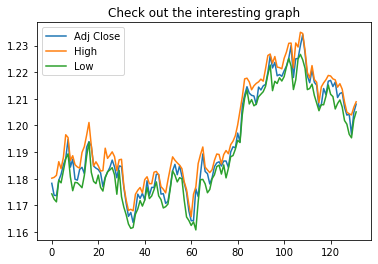

In [18]:
plt.plot(range(len(data["Date"])), data["Adj Close"], label = "Adj Close")
plt.plot(range(len(data["Date"])), data["High"], label = "High")
plt.plot(range(len(data["Date"])), data["Low"], label = "Low")
plt.title('Check out the interesting graph')
plt.legend()
plt.show()

#### Step 2: Linear Regression, Gradient Descent, Self Implemented

#### derivation
Let cost function be: $c = \sum_{k=1}^{M}{\lVert y_k - w^{T} x_k   \rVert_{2}^{2}}$, then getting it in the matrix form, such that:
$X = [\vec f_1, ......, \vec f_N, \vec 1]$ where $f_i$ are feature vectors. In this case we have that:

$c = (X \vec w - \vec t)^{T} (X \vec w - \vec t) = {\vec w}^{T} X^{T} X {\vec w} - {\vec w}^{T} X^{T}t - {\vec t}^{T} X \vec w + {\vec t}^{T}{\vec t}$
$$ = {\vec w}^{T} X^{T} X {\vec w} - 2{\vec w}^{T} X^{T}t + {\vec t}^{T}{\vec t}$$
Again taking gradient, we see that:
$D_{\vec w}c = 2 (X^{T}X \vec w - X^{T} \vec t)$. We will adopt the simplest descent algorithm.

In [79]:
class regressor:
    def __init__(self):
        self.w = None
        
    def train(self, dtrain, labels, n_epochs, gamma):
        if dtrain.shape[0] != labels.shape[0]:
            print("Erorr: training set and label set must have same length")
            return
        
        if n_epochs <= 0:
            print("enter training rounds at least 1")
            return
        
        if gamma > 1 or gamma <= 0:
            print("please enter the correct learning rate")
            return
        
        w = np.zeros(dtrain.shape[1])
        X = dtrain
        y = labels
        for _ in range(n_epochs):
            w = w - (2 * gamma) * (np.dot(np.dot(X.T, X), w) - np.dot(X.T, y))
        
        self.w = w
    
    def predict(self, dtest):
        if not dtest:
            return

#### Step 3: Split training and testing set

In [136]:
labels = data["Adj Close"].values
print(labels.shape, type(labels))

(132,) <class 'numpy.ndarray'>


In [137]:
dtrain = [[i] for i in range(len(data["Date"]))]
dtrain = np.asarray(dtrain)
dtrain = np.append(dtrain, np.ones((len(data["Date"]), 1)), axis = 1)
print("Shape of training data is: {}".format(dtrain.shape))
print(dtrain[:3,:])

Shape of training data is: (132, 2)
[[0. 1.]
 [1. 1.]
 [2. 1.]]


In [141]:
X_train = dtrain
y_train = labels
print(X_train.shape, y_train.shape)

(132, 2) (132,)


#### Step4: Build the model and start the training

In [142]:
n_epochs = 100000
gamma = 1e-6
model = regressor()
model.train(X_train, y_train, n_epochs, gamma)

In [144]:
w = model.w

#### Step5: Draw the graphs

In [147]:
preds = [(x * w[0]) + w[1] for x in range(len(data["Date"]))]

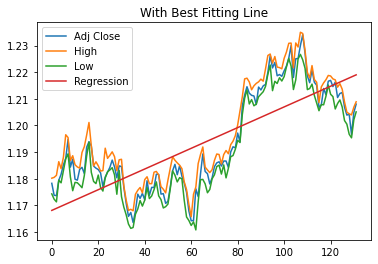

In [148]:
plt.plot(range(len(data["Date"])), data["Adj Close"], label = "Adj Close")
plt.plot(range(len(data["Date"])), data["High"], label = "High")
plt.plot(range(len(data["Date"])), data["Low"], label = "Low")
plt.plot(range(len(data["Date"])), preds, label = "Regression")
plt.title('With Best Fitting Line')
plt.legend()
plt.show()

## DISCLAIMER:
Some version of gradient disappearence occurs. In normal regresison we'll probably scale the feature vectors within a sphere, but this is kind of tricky with time as our features. The usual way to deal with this is to use time series techniques.